# Regressão linear Múltipla

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os
print(os.listdir("../input"))
plt.style.use('bmh')

['measures_v2.csv']


In [2]:
df = pd.read_csv('../input/measures_v2.csv')
df.shape


(1330816, 13)

In [3]:
# remoção da coluna torque, pois não servirá como variável nem de entrada e nem de saída
df.drop('torque', axis=1, inplace=True)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#testagens separadas pra teste
test_set_profiles = [65, 72]
x_cols = ['ambient', 'coolant','i_q', 'u_q','i_d', 'u_d', 'motor_speed']

#separado 2 datasets, um com as testagens que serão usadas pra treino e outro as de teste
trainset = df.loc[~df.profile_id.isin(test_set_profiles), :].reset_index(drop=True)
testset = df.loc[df.profile_id.isin(test_set_profiles), :].reset_index(drop=True)


X_train = trainset.loc[:, x_cols]
y_train = trainset.loc[:, 'pm']
X_test = testset.loc[:, x_cols]
y_test = testset.loc[:, 'pm']

In [6]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Modelagem

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
test_predictions = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [11]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [12]:
MAE

9.765122167727663

In [13]:
MSE

143.8072996275585

In [14]:
RMSE

11.99196812985919

In [15]:
#valor médio das temperaturas do rotor em todo o dataset - para comparar com o RMSE
#ou seja, as previsões do modelo variam 12 para + e - de 58,51
df['pm'].mean()

58.50677585061559

In [16]:
model.coef_

array([ 3.39392697,  0.27145154, -0.02287735, -0.15482876, -0.00601107,
       -0.06340897,  0.00594203])

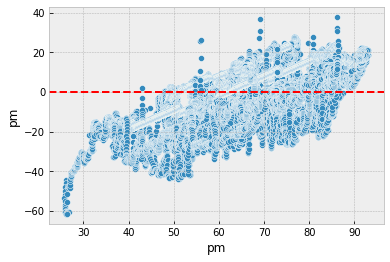

In [18]:
# plotagem da distribuição dos resíduos
test_res = y_test - test_predictions

sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

nota-se que os resíduos tem uma distribuição com tendencia
o que significa que o modelo não é o mais adequado

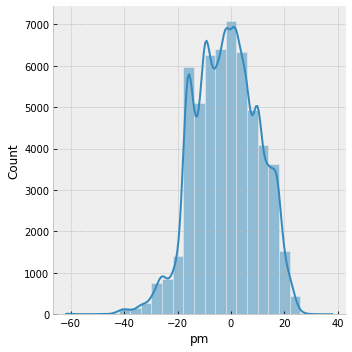

In [25]:
#plotagem da distribuição dos resíduos pra verificar visualmente a normalidade
sns.displot(test_res,bins=25,kde=True)

In [21]:
import scipy as sp

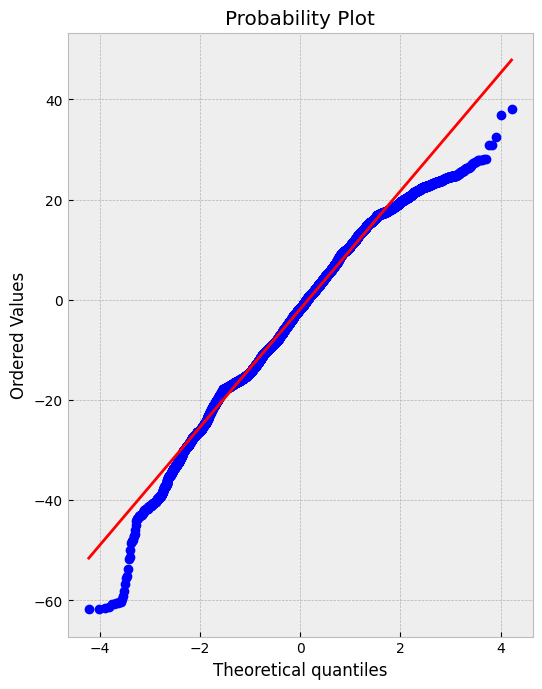

In [22]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

como os resíduos se afastam da linha vermelha (correspondente à normal) no início e no fim, percebe-se visualmente que não seguem uma distribuição normal

In [23]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 2.836e+05
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:30:43   Log-Likelihood:            -4.9772e+06
No. Observations:             1275421   AIC:                         9.954e+06
Df Residuals:                 1275413   BIC:                         9.955e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -40.4545      0.154   -262.057      0.000     -40.757     -40.152
ambient         3.3939      0.007    508.585      0.000       3.381       3.407
coolant         0.2715      0.001    467.796      0.000       0.270       0.273
i_q            -0.0229      0.000   -105.111      0.000      -0.023      -0.022
u_q            -0.1548      0.001   -283.136      0.000      -0.156      -0.154
i_d            -0.0060      0.000    -15.403      0.000      -0.007      -0.005
u_d            -0.0634      0.000   -205.012      0.000      -0.064      -0.063
motor_speed     0.0059   1.98e-05    299.922      0.000       0.006       0.006
==============================================================================
Omnibus:                    44808.966   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76068.509
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                       4.025   Cond. No.                     4.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final Model

Aplicação do modelo de regressão linear em todos os dados do dataset, sem separar entre teste e treino.

In [27]:
X = df[x_cols]
y = df['pm']

final_model = LinearRegression()
final_model.fit(X,y)
y_hat = final_model.predict(X)

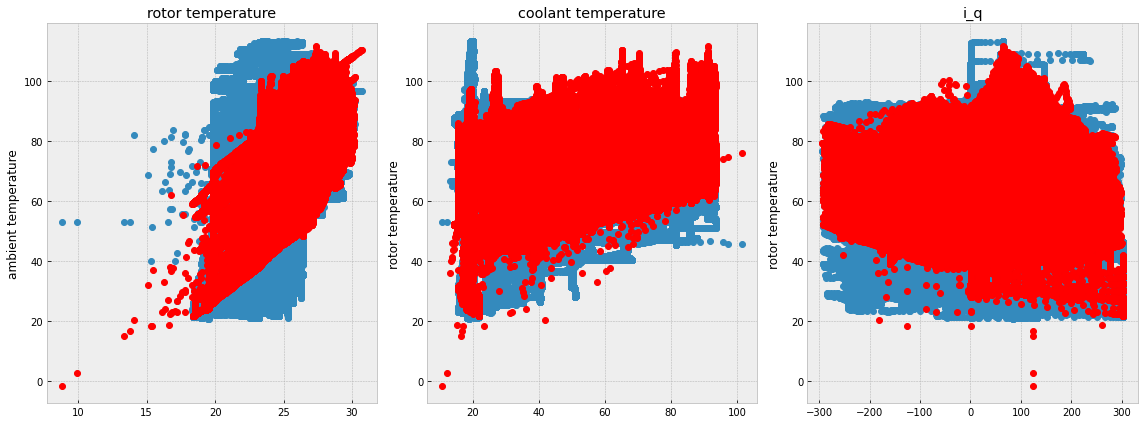

In [30]:
#visualização de como as predições do modelo (em vermelho) se comparam 
#com a distribuição dos dados reais do dataset


fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

# plotting the real data points
axes[0].plot(df['ambient'],df['pm'],'o')
#plotting the predicted data points in red
axes[0].plot(df['ambient'],y_hat,'o',color='red')
axes[0].set_ylabel("ambient temperature")
axes[0].set_title("rotor temperature")

axes[1].plot(df['coolant'],df['pm'],'o')
axes[1].plot(df['coolant'],y_hat,'o',color='red')
axes[1].set_title("coolant temperature")
axes[1].set_ylabel("rotor temperature")

axes[2].plot(df['i_q'],df['pm'],'o')
axes[2].plot(df['i_q'],y_hat,'o',color='red')
axes[2].set_title("i_q");
axes[2].set_ylabel("rotor temperature")
plt.tight_layout();

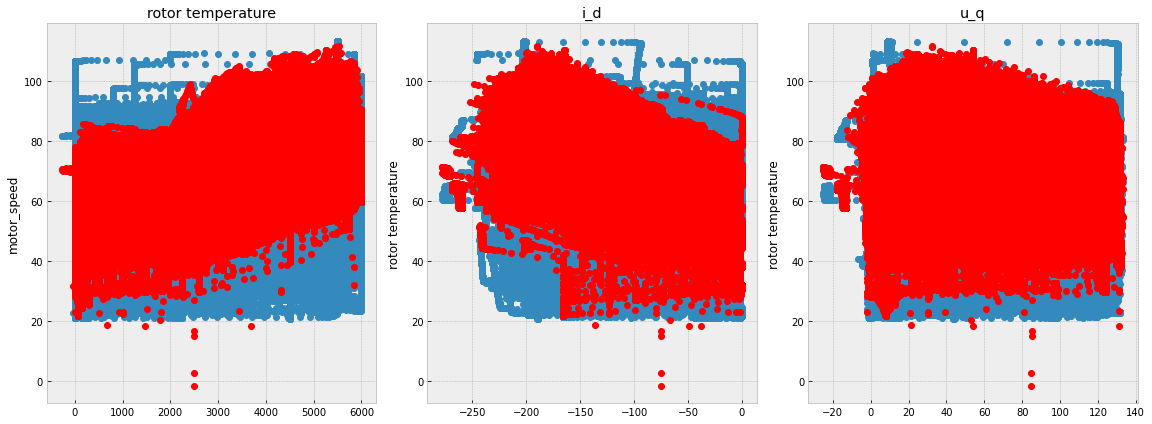

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

# plotting the real data points
axes[0].plot(df['motor_speed'],df['pm'],'o')
#plotting the predicted data points in red
axes[0].plot(df['motor_speed'],y_hat,'o',color='red')
axes[0].set_ylabel("motor_speed")
axes[0].set_title("rotor temperature")

axes[1].plot(df['i_d'],df['pm'],'o')
axes[1].plot(df['i_d'],y_hat,'o',color='red')
axes[1].set_title("i_d")
axes[1].set_ylabel("rotor temperature")

axes[2].plot(df['u_q'],df['pm'],'o')
axes[2].plot(df['u_q'],y_hat,'o',color='red')
axes[2].set_title("u_q");
axes[2].set_ylabel("rotor temperature")
plt.tight_layout();

In [31]:
residuals = y_hat - y

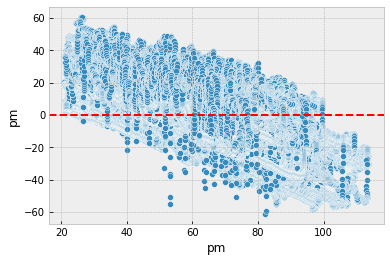

In [32]:
#plotagem de todos os resíduos

sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [34]:
#coeficientes no modelo final
final_model.coef_

array([ 3.35978567,  0.27191838, -0.02561786, -0.14545868, -0.01134362,
       -0.06481298,  0.0056019 ])

In [36]:
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 2.881e+05
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:49:01   Log-Likelihood:            -5.1932e+06
No. Observations:             1330816   AIC:                         1.039e+07
Df Residuals:                 1330808   BIC:                         1.039e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.7694      0.152   -261.383      0.000     -40.068     -39.471
x1             3.3598      0.007    512.969      0.000       3.347       3.373
x2             0.2719      0.001    481.000      0.000       0.271       0.273
x3            -0.0256      0.000   -120.999      0.000      -0.026      -0.025
x4            -0.1455      0.001   -272.776      0.000      -0.147      -0.144
x5            -0.0113      0.000    -29.869      0.000      -0.012      -0.011
x6            -0.0648      0.000   -216.951      0.000      -0.065      -0.064
x7             0.0056   1.93e-05    290.554      0.000       0.006       0.006
==============================================================================
Omnibus:                    44153.779   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73587.200
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                       3.984   Cond. No.                     4.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Olhando para os valores de p de cada variável, todos eles parecem ser significativos e estão prevendo a temperatura  do rotor, pois os valores de p são muito baixos.




# Análise dos resultados da regressão múltipla

O R² mostra que o modelo calculado explica em 60,2% dos valores mensurados.
A variável mais influente é temperatura ambiente (x1) que, no momento da aferição, tem coeficiente linear de 3,3598. A segunda variável mais influente dada pelo modelo é a de temperatura do líquido de arrefecimento (x2), com coeficiente linear de 0,2719.

Olhando para os valores de p de cada variável, todos eles parecem ser significativos e estão prevendo a temperatura do rotor do estator, pois os valores de p são muito baixos.

A pontuação do teste Durbin-Watson também está muito próxima de 0, portanto, podemos dizer que há uma autocorrelação positiva no conjunto de dados.

O valor Prob(JP) para o teste de Jarque-Bera é menor que 0,05, então rejeitamos a hipótese nula de que os resíduos (variação natural dos dados que o modelo não capturou) são normalmente distribuídos, conforme será mostrado visuamente abaixo. 


<AxesSubplot:ylabel='Density'>

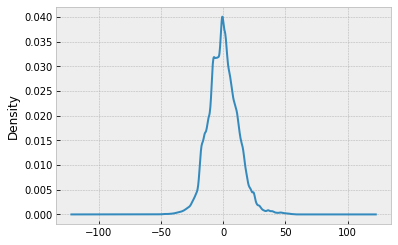

In [37]:
results.resid.plot(kind = 'density')

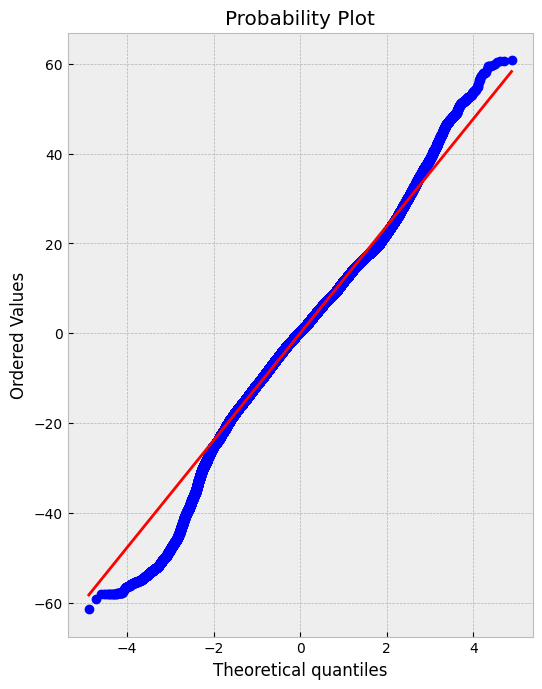

In [41]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(residuals,plot=ax)

Como podemos ver no gráfico de histograma dos resíduos, bem como na distibuição normal de probabilidade, os resíduos são baixos e distribuídos  ao redor do centro, mas se desviam da distribuição normal para os extremos, o que pode ser o fator que influencia o teste de JB e falhar no teste de normalidade.
